# Scientific Programming with Python
## Assignment: World Happiness Report
### SciPro_ID: 2024WS_93
####
#### Karl N. Kirschner, 
#### Department of Computer Science, University of Applied Sciences Bonn-Rhein-Sieg, Sankt Augustin, Germany

#### Date: 07.11.2024
#####
#### Goal: 
Familiarize myself with Pandas [1,2] library and analyzing the world happiness based on datasets from the Gallup World Poll [3,4,5]. 

In [1]:
import pandas as pd

In [2]:
def calculate_country_means(df):
    """
    Calculate the mean of each numeric category on a per-country basis.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with a 'Country name' column and numeric categories.
    
    Returns:
    pd.DataFrame: A DataFrame with one row per country and the mean of each numeric category.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected 'df' to be a pandas DataFrame.")
        
    country_means = df.groupby('Country name').mean().reset_index()
    
    return country_means

In [3]:
def display_correlation_matrix(df):
    """
    Computes and displays the correlation matrix for the numeric columns
    in the DataFrame using the Pearson method.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing numeric columns.
    
    Returns:
    pd.DataFrame: The correlation matrix DataFrame.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected 'df' to be a pandas DataFrame.")
    
    numeric_df = df.select_dtypes(include='number')

    correlation_matrix = numeric_df.corr(method='pearson')
    
    return correlation_matrix

In [4]:
def generate_scatter_plot(df, x_column, y_column, x_label='X-axis', y_label='Y-axis', title='Scatter Plot', color='blue'):
    """
    Generates a scatter plot for given x and y data from a DataFrame using pandas plot.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    x_column (str): Column name for the x-axis data.
    y_column (str): Column name for the y-axis data.
    x_label (str): Label for the x-axis (default: 'X-axis').
    y_label (str): Label for the y-axis (default: 'Y-axis').
    title (str): Title of the plot (default: 'Scatter Plot').
    color (str): Color of the scatter points (default: 'blue').
    
    Returns:
    None: Displays the scatter plot.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected 'df' to be a pandas DataFrame.")
    if x_column not in df.columns:
        raise ValueError("x_column ist not part of the DataFrame df.")
    if y_column not in df.columns:
        raise ValueError("y_column ist not part of the DataFrame df.")
    
    plot = df.plot(kind='scatter', x=x_column, y=y_column, color=color, figsize=(8, 6), title=title)
    
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    
    plot.grid(True)

In [5]:
def merge_multiple_dataframes(dfs_dict):
    """
    Merges multiple DataFrames provided in a dictionary.
    
    Parameters:
    - dfs_dict (dict): Dictionary where keys are names (or identifiers) 
      and values are DataFrames to be merged.
      
    Returns:
    - pd.DataFrame: The merged DataFrame.
    """
    if not isinstance(dfs_dict, dict):
        raise TypeError("Expected 'dfs' to be a dictionary.")
    
    dfs_iterator = iter(dfs_dict.values())
    merged_df = next(dfs_iterator)
    
    for df in dfs_iterator:
        merged_df = pd.merge(merged_df, df, how='outer')
    
    return merged_df

In [6]:
def plot_ladder_score_vs_others(df):
    """
    Plots 'Ladder score' against all other numeric columns in the DataFrame
    using the `generate_scatter_plot` function.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing 'Ladder score' and other numeric columns.
    
    Returns:
    None: Displays scatter plots.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected 'df' to be a pandas DataFrame.")
    if 'Ladder score' not in df.columns:
        raise ValueError("The DataFrame must contain a 'Ladder score' column.")
    
    numeric_columns = df.select_dtypes(include='number').columns
    other_numeric_columns = [col for col in numeric_columns if col != 'Ladder score']
    
    for col in other_numeric_columns:
        generate_scatter_plot(
            df,
            x_column='Ladder score',
            y_column=col,
            x_label='Ladder score',
            y_label=col,
            title=f'Ladder score vs {col}'
        )

In [7]:
def remove_columns(df, remove_dict):
    """
    Removes all columns from df where the columns match any value in remove_dict.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame from which columns will be removed.
    - remove_dict (dict): Dictionary where values are the column names to delete.
      
    Returns:
    - pd.DataFrame: The DataFrame without the specified columns.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected 'df' to be a pandas DataFrame.")
    if not isinstance(remove_dict, dict):
        raise TypeError("Expected 'remove_dict' to be a dictionary.")
    
    # Stores values from dictionary in list
    columns_to_remove = list(remove_dict.values())
    
    return df.drop(columns=columns_to_remove)

In [8]:
def rename_columns(df, rename_dict):
    """
    Renames columns in a Pandas DataFrame based on a dictionary of old and new column names.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame whose columns will be renamed.
    - rename_dict (dict): The dictionary for renaming, where keys are old column names and values are new column names.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Expected 'df' to be a pandas DataFrame.")
    if not isinstance(rename_dict, dict):
        raise TypeError("Expected 'rename_dict' to be a dictionary.")
    
    df.rename(columns=rename_dict, inplace=True)

#### Task 1:
Data preparation part 1 - unifying the datasets

##### a)
Load the 3 datasets as separate dataframes.

In [9]:
reports = {
    "report_2005_to_2021" : pd.read_csv('report_2005_to_2021.csv'),
    "report_2022" : pd.read_csv('report_2022.csv'),
    "report_2023" : pd.read_csv('report_2023.csv')
}

##### b)
Unify the column headers by renaming them in the report_2005_to_2021.csv dataframe in the following way:
- "Life Ladder" -> "Ladder score"
- "Log GDP per capita" -> "Logged GDP per capita"

In [10]:
rename_columns(reports["report_2005_to_2021"], {'Life Ladder' : 'Ladder score', 'Log GDP per capita' : 'Logged GDP per capita'})

##### c)
Merge the three dataframes together.

In [11]:
merged_report_2005_to_2023 = merge_multiple_dataframes(reports)
merged_report_2005_to_2023

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2440,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2441,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2442,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2443,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


#### Task 2:
Data preparation part 2 - cleaning

##### a)
Remove duplicated rows.

In [12]:
droped_duplicates_report = merged_report_2005_to_2023.drop_duplicates()

##### b)
Remove the columns "year" and "Generosity".

In [13]:
removed_columns_report = remove_columns(droped_duplicates_report, {"1" : "year", "2" : "Generosity"})

##### c)
Remove rows that have empty cells.

In [14]:
cleaned_reports_2005_to_2023 = removed_columns_report.dropna(how='all')
cleaned_reports_2005_to_2023

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724,7.350,0.451,50.500,0.718,0.882,0.414,0.258
1,Afghanistan,4.402,7.509,0.552,50.800,0.679,0.850,0.481,0.237
2,Afghanistan,4.758,7.614,0.539,51.100,0.600,0.707,0.517,0.275
3,Afghanistan,3.832,7.581,0.521,51.400,0.496,0.731,0.480,0.267
4,Afghanistan,3.783,7.661,0.521,51.700,0.531,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...
2440,Zimbabwe,2.694,7.698,0.759,53.100,0.632,0.831,0.658,0.235
2441,Zimbabwe,3.160,7.596,0.717,53.575,0.643,0.789,0.661,0.346
2442,Zimbabwe,3.155,7.657,0.685,54.050,0.668,0.757,0.610,0.242
2443,Zimbabwe,3.296,7.670,0.666,54.525,0.652,0.753,0.641,0.191


#### Task 3:
Data analysis, visualization and saving

##### a)
Compute the mean of each numeric category on a per country basis.

In [15]:
mean_reports = calculate_country_means(cleaned_reports_2005_to_2023)

##### b)
Save the resulting dataframe to a CSV-formatted file.

In [16]:
mean_reports.to_csv('mean_world_happiness_per_country.csv', index=False)

##### c)
Create a user-defined function that generates a scatter plots of x- and y- data.

In [17]:
# the function is at the start of the notebook/generate_scatter_plot

##### d)
Plot the "Ladder score" versus the other numeric-based columns.

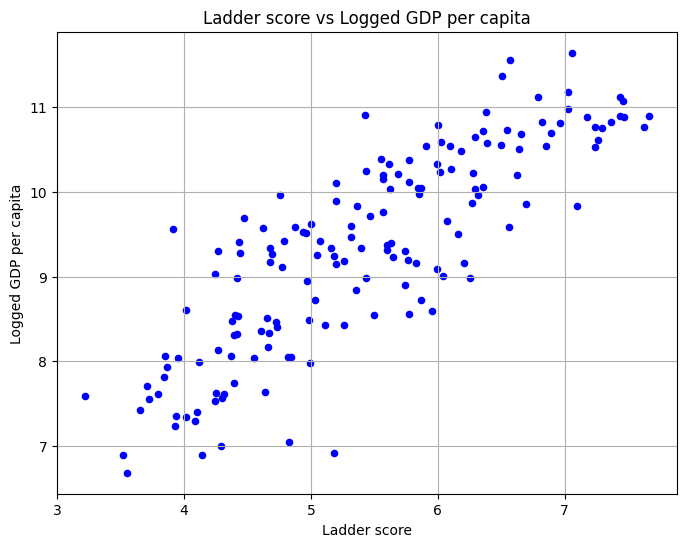

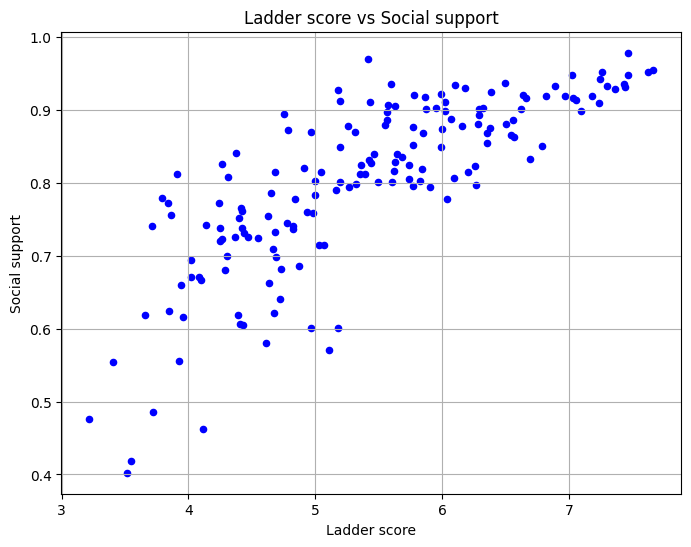

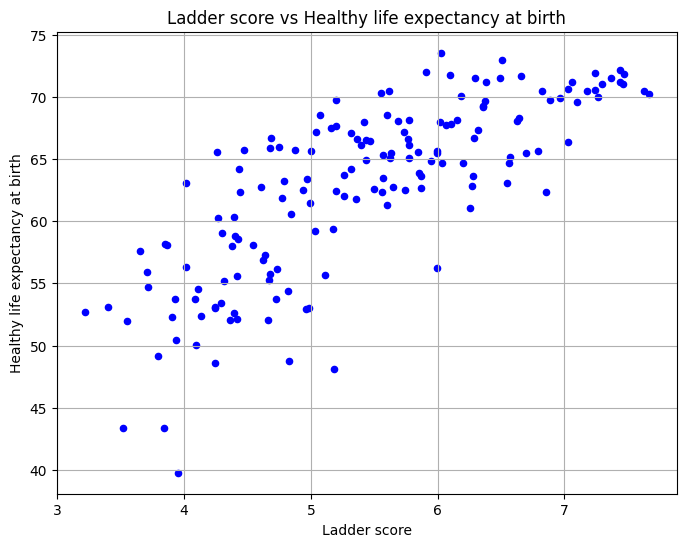

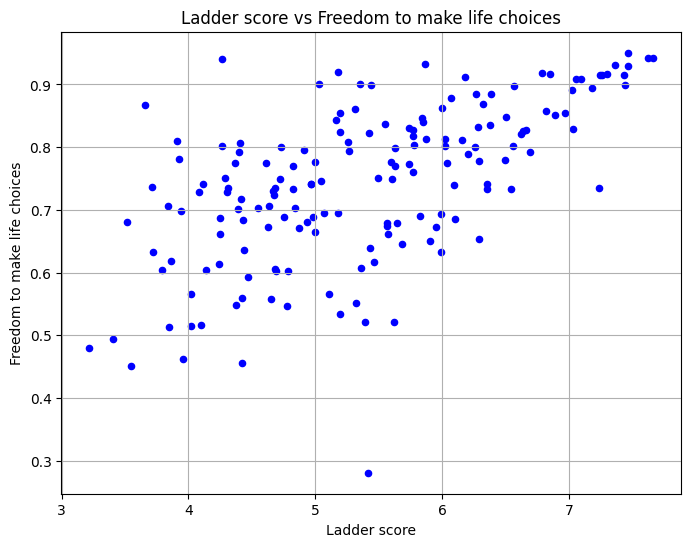

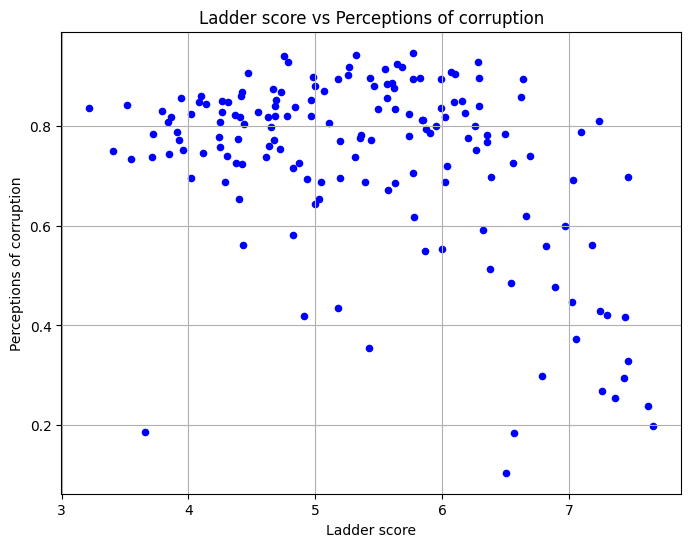

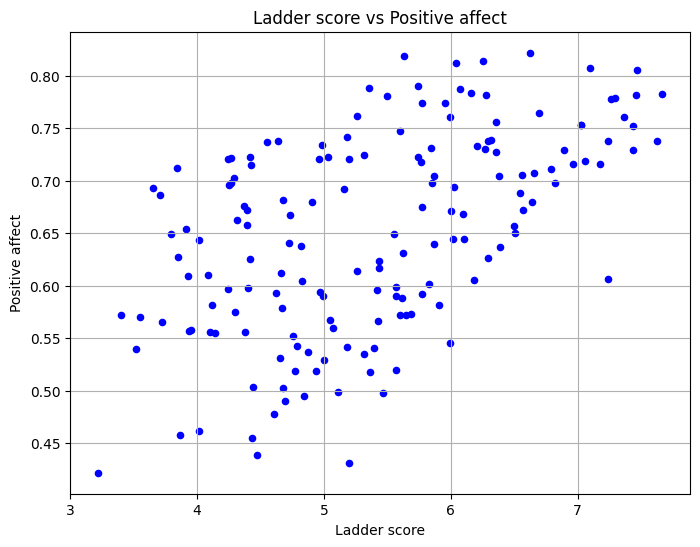

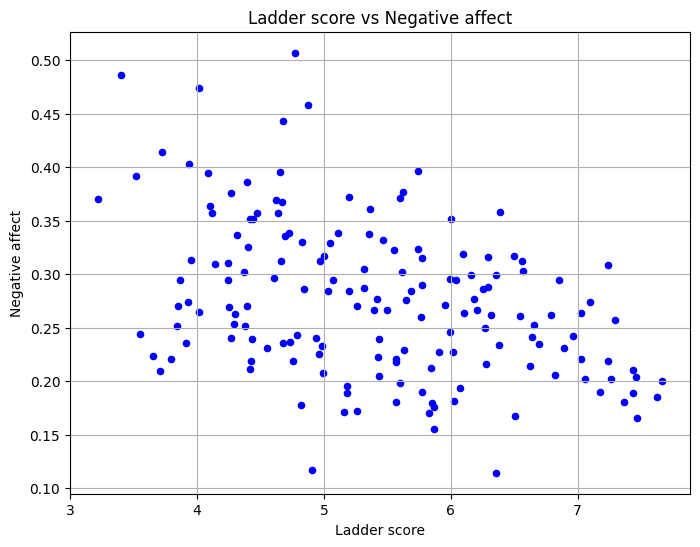

In [18]:
plot_ladder_score_vs_others(mean_reports)

##### e)
Compute and display a correlation matrix dataframe for the numeric-based columns using the Pearson method.

In [19]:
correlation_matrix = display_correlation_matrix(mean_reports)
correlation_matrix

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect
Ladder score,1.000000,0.834664,0.783736,0.777755,0.604347,-0.433471,0.535612,-0.407991
Logged GDP per capita,0.834664,1.000000,0.766585,0.833759,0.436487,-0.367757,0.255724,-0.322188
Social support,0.783736,0.766585,1.000000,0.702288,0.438298,-0.221778,0.441644,-0.492006
Healthy life expectancy at birth,0.777755,0.833759,0.702288,1.000000,0.397935,-0.275856,0.222680,-0.270739
Freedom to make life choices,0.604347,0.436487,0.438298,0.397935,1.000000,-0.509046,0.646633,-0.411871
Perceptions of corruption,-0.433471,-0.367757,-0.221778,-0.275856,-0.509046,1.000000,-0.286515,0.330431
Positive affect,0.535612,0.255724,0.441644,0.222680,0.646633,-0.286515,1.000000,-0.409428
Negative affect,-0.407991,-0.322188,-0.492006,-0.270739,-0.411871,0.330431,-0.409428,1.000000


##### f)
Briefly comment on the results.

#### Conclusion:
The analysis of the World Happiness Report data reveals clear relationships between various life factors and overall happiness, represented by the Ladder score. By calculating the mean values and generating scatter plots of the Ladder score against other factors, we observed positive correlations with aspects such as Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, and Positive affect. In all these areas, higher levels were associated with an increase in the Ladder score, indicating that countries with stronger economic stability, supportive social networks, greater life expectancy, and personal freedoms tend to have higher happiness scores.

Conversely, for Perceptions of corruption and Negative affect, a unique trend emerged: the Ladder score is generally higher where perceptions of corruption are lower and negative emotions are less prominent. This implies that societal trust and emotional well-being may also play significant roles in national happiness.

To further validate these observations, we computed a correlation matrix using the Pearson method to measure the strength of these relationships quantitatively. The matrix confirmed a strong positive correlation between the Ladder score and factors like GDP, social support, life expectancy, and personal freedom, while showing a negative correlation with perceptions of corruption and negative emotions.

#### References
1. The Pandas Development Team pandas-dev/pandas: Pandas Zenodo, 2020 (https://pandas.pydata.org)
2. Pandas user guide. Available at https://pandas.pydata.org/docs/user_guide/index.html. Accessed on November 07, 2024.
3. Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). World Happiness Report 2022. New York: Sustainable Development Solutions Network.
4. World Happiness Report, https://worldhappiness.report/, visited on November 07, 2024.
5. World Happiness Report Appendix_1_StatiscalAppendix_Ch2, https://happiness-report.s3.amazonaws.com/2022/Appendix_1_StatiscalAppendix_Ch2.pdf, visited on November 07, 2024.